In [59]:
import pandas as pd
import os  # Importer le module os pour obtenir le répertoire courant

def ouvrir_et_concatener(fichiers_pays):
    dfs = {}
    output_dir = os.getcwd()  # Utiliser le répertoire courant
    
    for pays, fichiers in fichiers_pays.items():
        dfs[pays] = pd.DataFrame()  # Créer un DataFrame vide pour chaque pays
        
        for fichier in fichiers:
            df_temp = pd.read_csv(fichier)  # Lire chaque fichier CSV
            dfs[pays] = pd.concat([dfs[pays], df_temp], ignore_index=True)  # Concaténer les données 
        
        # Enregistrer le DataFrame concaténé dans un nouveau fichier CSV dans le répertoire courant
        output_file = f"{output_dir}/{pays}_concatene.csv"
        dfs[pays].to_csv(output_file, index=False)  # Sauvegarder sans l'index dans le CSV
    
    return dfs

# Liste des fichiers par pays
fichiers_pays = {
    'lettonie': ['LV_2021_daily.csv', 'LV_2022_daily.csv', 'LV_2023_daily.csv', 'LV_2024_daily.csv'],
    'hongrie': ['HU_2021_daily.csv', 'HU_2022_daily.csv', 'HU_2023_daily.csv', 'HU_2024_daily.csv'],
    'slovaquie': ['SK_2021_daily.csv', 'SK_2022_daily.csv', 'SK_2023_daily.csv', 'SK_2024_daily.csv'],
    'france': ['FR_2021_daily.csv', 'FR_2022_daily.csv', 'FR_2023_daily.csv', 'FR_2024_daily.csv']
}

# Appel de la fonction pour ouvrir, concaténer et enregistrer les fichiers
dataframes = ouvrir_et_concatener(fichiers_pays)


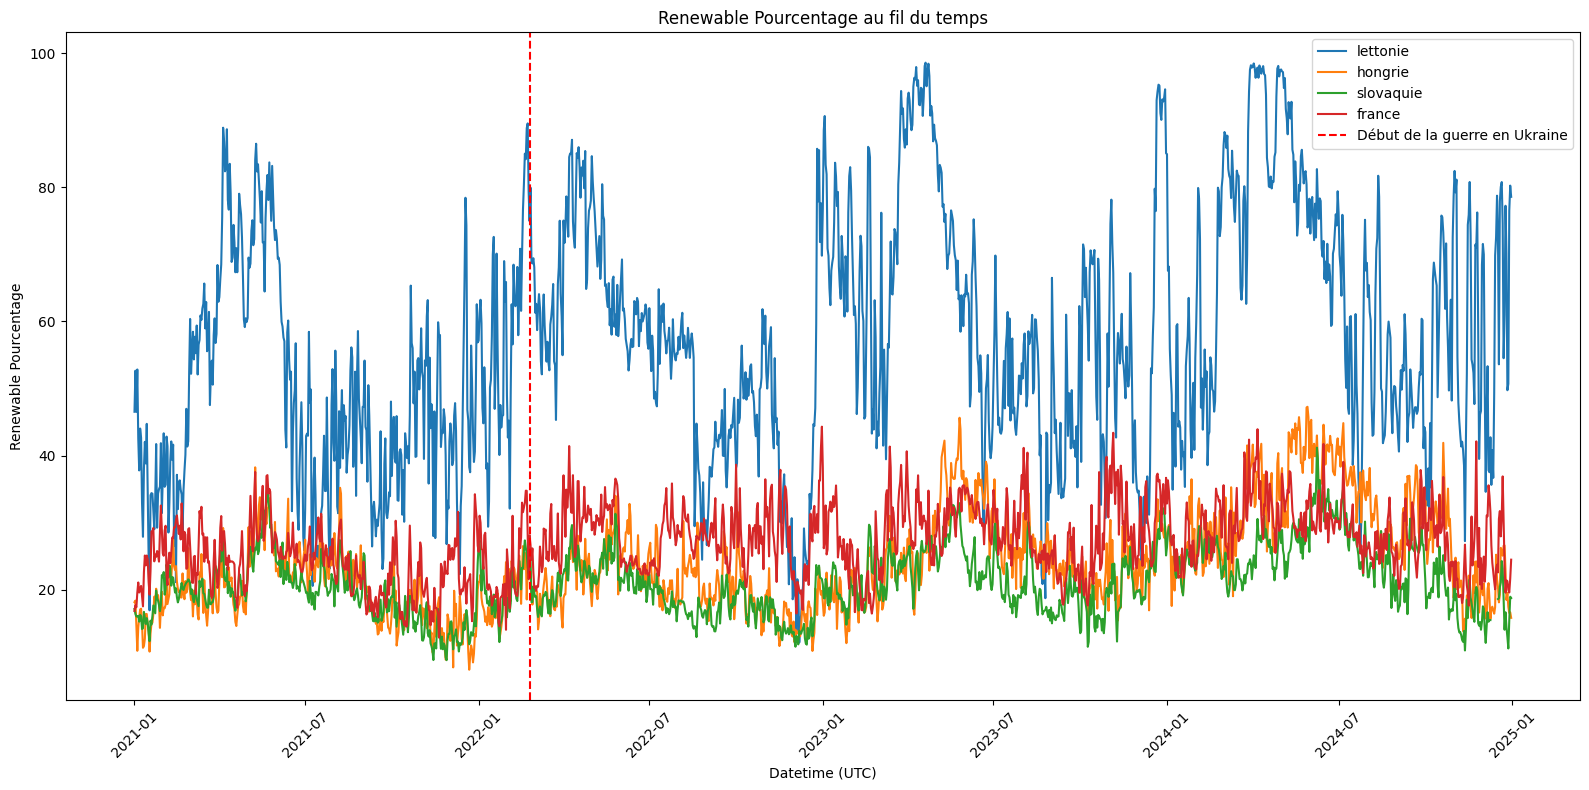

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

def tracage(df_pays, pays):
    # Convertir la colonne 'Datetime (UTC)' en datetime
    df_pays['Datetime (UTC)'] = pd.to_datetime(df_pays['Datetime (UTC)'])
    # Tracer la colonne 'Renewable Pourcentage' en fonction de 'Datetime (UTC)'
    plt.plot(df_pays['Datetime (UTC)'], df_pays['Renewable Percentage'], label=pays)

plt.figure(figsize=(16, 8))

# Tracer pour chaque pays
for pays, df in dataframes.items():
    tracage(df, pays)

date_guerre_ukraine = pd.to_datetime('2022-02-24')  # Date de début de la guerre en Ukraine
plt.axvline(x=date_guerre_ukraine, color='red', linestyle='--', label="Début de la guerre en Ukraine")

# Ajouter des labels et une légende
plt.xlabel('Datetime (UTC)')
plt.ylabel('Renewable Pourcentage')
plt.title('Renewable Pourcentage au fil du temps')
plt.legend()

# Afficher le graphique
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()  
plt.show()


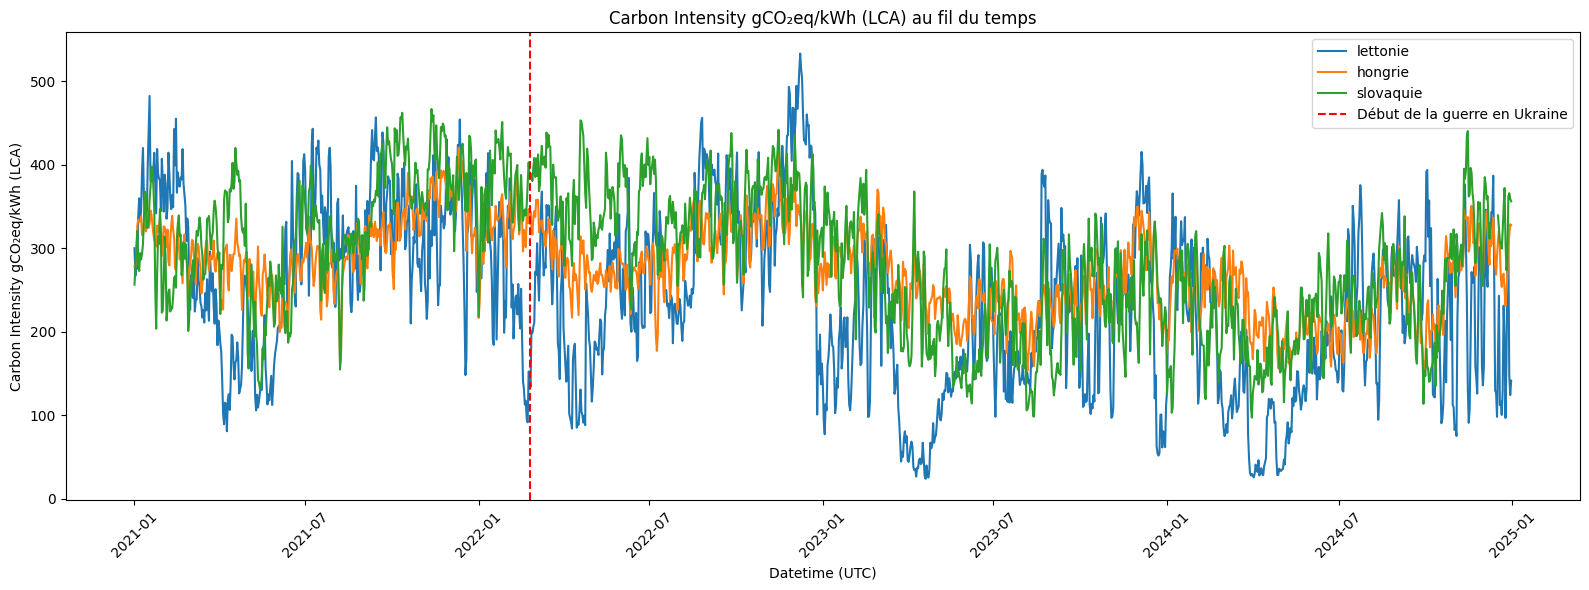

In [58]:
def tracage(df_pays, pays):
    # Convertir la colonne 'Datetime (UTC)' en datetime
    df_pays['Datetime (UTC)'] = pd.to_datetime(df_pays['Datetime (UTC)'])
    # Tracer la colonne 'Renewable Pourcentage' en fonction de 'Datetime (UTC)'
    plt.plot(df_pays['Datetime (UTC)'], df_pays['Carbon Intensity gCO₂eq/kWh (LCA)'], label=pays)

plt.figure(figsize=(16, 6))

# Tracer pour chaque pays
for pays, df in dataframes.items():
    tracage(df, pays)

date_guerre_ukraine = pd.to_datetime('2022-02-24')  # Date de début de la guerre en Ukraine
plt.axvline(x=date_guerre_ukraine, color='red', linestyle='--', label="Début de la guerre en Ukraine")

# Ajouter des labels et une légende
plt.xlabel('Datetime (UTC)')
plt.ylabel('Carbon Intensity gCO₂eq/kWh (LCA)')
plt.title('Carbon Intensity gCO₂eq/kWh (LCA) au fil du temps')
plt.legend()

# Afficher le graphique
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.tight_layout()  
plt.show()